[41.303242020560404,41.303242020560404,41.303242020560404,41.303242020560404]


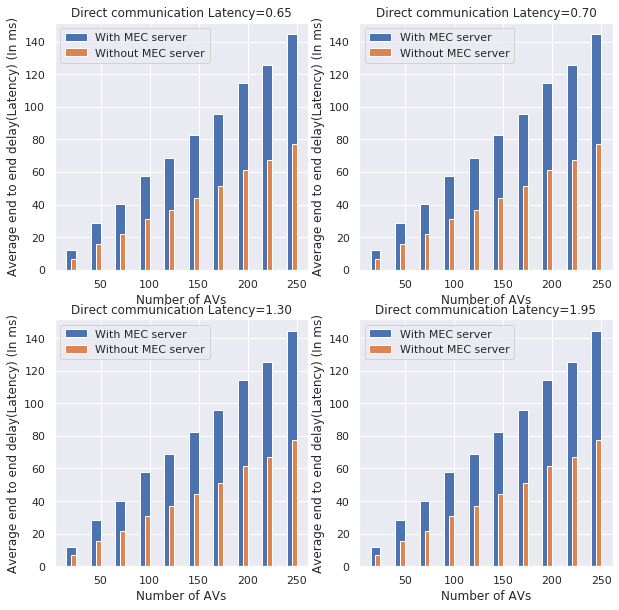

In [168]:
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
pd.options.display.max_rows=10
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import xgboost
import graphviz
import matplotlib.dates as md
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import csv   
#import MyAnalysis 
rcParams['figure.figsize'] = 7.5,7.5
import seaborn
seaborn.set() #make the plots look pretty
#Import for threading

import random
import sys
from threading import Thread, RLock
import time

import numpy as np

#homeTraceFile="/home/fsmiguel/Documents/trace/"
homeTraceFile="/home/fsmiguel/Documents/trace/versions/DirectCommunication_1.95/"
#homeTraceFileResult="/home/fsmiguel/Documents/trace/result/"
homeTraceFileResult="/home/fsmiguel/Documents/trace/versions/DirectCommunication_1.95/Resulting_Curves/tracer/"
homeTraceFileResultImg="/home/fsmiguel/Documents/trace/versions/DirectCommunication_1.95/Resulting_Curves/"
#For tasks
#dfTask = pd.read_table("/home/fsmiguel/Documents/trace/Task.csv",sep = ',',header = 0)
#print(df)


#For Latency
#dfLatency = pd.read_table("/home/fsmiguel/Documents/trace/Latency.csv",sep = ',',header = 0)

#Function that helps to create the final file to store resulting means from initial simulations
def createPythonTraceFile(homeTraceFileResult):
    latency = pd.DataFrame(columns=['NumberOfTasks','numOfAVs','taskDelay', 'wanDelay'
                                    ,'manDelay','wlanDelay','lanDelay','directCommunicationDelay'])
    task=pd.DataFrame(columns=['numOfAVs','NumberOfTasks', 'NumberOfLocalTask','NumberOfAwayTaskDueToPosition'
                              ,'NumberOfAwayTaskDueToCapacity','NumberOfTaskProcessed'])
    computing=pd.DataFrame(columns=['numOfAVs','NumberOfTasks', 'UsedComputingRessource','AvailableComputingRessource'])
    storing=pd.DataFrame(columns=['numOfAVs','NumberOfTasks', 'UsedStoringRessource','AvailableStoringRessource'])
    ram=pd.DataFrame(columns=['numOfAVs','NumberOfTasks', 'UsedRamRessource','AvailableRamRessource'])
    bandwidth=pd.DataFrame(columns=['numOfAVs','ras', 'ras','ras'])

    latency.to_csv(homeTraceFileResult+'Latency.csv', index=False)
    task.to_csv(homeTraceFileResult+'Task.csv', index=False)
    computing.to_csv(homeTraceFileResult+'Computing.csv', index=False)
    storing.to_csv(homeTraceFileResult+'Storing.csv', index=False)
    ram.to_csv(homeTraceFileResult+'Ram.csv', index=False)
    bandwidth.to_csv(homeTraceFileResult+'Bandwidth.csv', index=False)




def meanComputation(listOftypeOfAnalysis,listOfAvNumber):
    for i in range(len(listOfAvNumber)):
        for j in range(len(listOftypeOfAnalysis)):
            fileName= listOftypeOfAnalysis[j]+str(listOfAvNumber[i])+"_AV.csv"
            tableReade=pd.read_table(homeTraceFile+fileName,sep = ',',header = 0)
            
            if listOftypeOfAnalysis[j]=="Latency_":
                numOfTasks=tableReade['NumberOfTasks']
                taskDelay=tableReade['taskDelay']
                wanDelay=tableReade['wanDelay']
                manDelay=tableReade['manDelay']
                wlanDelay=tableReade['wlanDelay']
                lanDelay=tableReade['lanDelay']
                directCommunicationDelay=tableReade['directCommunicationDelay']
                fields=[np.mean(numOfTasks)
                        ,listOfAvNumber[i]
                        ,np.sum(taskDelay)/np.mean(numOfTasks)
                        ,np.sum(wanDelay)/np.mean(numOfTasks)
                        ,np.sum(manDelay)/np.mean(numOfTasks)
                        ,np.sum(wlanDelay)/np.mean(numOfTasks)
                        ,np.sum(lanDelay)/np.mean(numOfTasks)
                        ,np.sum(directCommunicationDelay)/np.mean(numOfTasks)
                       ]
                location=homeTraceFileResult+'Latency.csv'
                with open(location, 'a',newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(fields)
            else:
                if listOftypeOfAnalysis[j]=="Task_":
                    numOfTasks=tableReade['NumberOfTasks']
                    numberOfLocalTask=tableReade['NumberOfLocalTask']
                    numberOfAwayTaskDueToPosition=tableReade['NumberOfAwayTaskDueToPosition']
                    numberOfAwayTaskDueToCapacity=tableReade['NumberOfAwayTaskDueToCapacity']
                    numberOfTaskProcessed=tableReade['NumberOfTaskProcessed']
                    fields=[listOfAvNumber[i],np.mean(numOfTasks),np.mean(numberOfLocalTask)
                        ,np.mean(numberOfAwayTaskDueToPosition)
                        ,np.mean(numberOfAwayTaskDueToCapacity),np.mean(numberOfTaskProcessed)]
                    location=homeTraceFileResult+'Task.csv'
                    with open(location, 'a',newline='') as f:
                        writer = csv.writer(f)
                        writer.writerow(fields)
                else:
                    if listOftypeOfAnalysis[j]=="Computing_":
                        numOfTasks=tableReade['NumberOfTasks']
                        usedComputingRessource=tableReade['UsedComputingRessource']
                        availableComputingRessource=tableReade['AvailableComputingRessource']
                        fields=[listOfAvNumber[i],np.mean(numOfTasks),np.mean(usedComputingRessource)
                        ,np.mean(availableComputingRessource)]
                        location=homeTraceFileResult+'Computing.csv'
                        with open(location, 'a',newline='') as f:
                            writer = csv.writer(f)
                            writer.writerow(fields)
                    else:
                        if listOftypeOfAnalysis[j]=="Storing_":
                            numOfTasks=tableReade['NumberOfTasks']
                            usedStoringRessource=tableReade['UsedStoringRessource']
                            availableStoringRessource=tableReade['AvailableStoringRessource']
                            fields=[listOfAvNumber[i],np.mean(numOfTasks),np.mean(usedStoringRessource)
                            ,np.mean(availableStoringRessource)]
                            location=homeTraceFileResult+'Storing.csv'
                            with open(location, 'a',newline='') as f:
                                writer = csv.writer(f)
                                writer.writerow(fields)
                        else:
                            if listOftypeOfAnalysis[j]=="Ram_":
                                numOfTasks=tableReade['NumberOfTasks']
                                usedRamRessource=tableReade['UsedRamRessource']
                                availableRamRessource=tableReade['AvailableRamRessource']
                                fields=[listOfAvNumber[i],np.mean(numOfTasks),np.mean(usedRamRessource)
                                ,np.mean(availableRamRessource)]
                                location=homeTraceFileResult+'Ram.csv'
                                with open(location, 'a',newline='') as f:
                                    writer = csv.writer(f)
                                    writer.writerow(fields)
                        
                

def simpleTaskCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Task.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    numberOfLocalTask=tableReade['NumberOfLocalTask']
    numberOfAwayTaskDueToPosition=tableReade['NumberOfAwayTaskDueToPosition']
    numberOfAwayTaskDueToCapacity=tableReade['NumberOfAwayTaskDueToCapacity']
    numberOfTaskProcessed=tableReade['NumberOfTaskProcessed']
    
    
    
    plt.plot(numAvs, numberOfTasks,label="Total Number of AVs requests",linestyle="--",lw=2)
    plt.plot(numAvs, numberOfLocalTask,label="Requests Computed inside MEC server",linestyle=":",lw=2)
    plt.plot(numAvs, numberOfAwayTaskDueToPosition,label="Requests Computed inside Cloud server",linestyle="-.",lw=2)
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    plt.fill_between(numAvs, numberOfLocalTask, numberOfAwayTaskDueToPosition, color='y', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of AVs')
    plt.ylabel('Number of requests')
    plt.grid(True)
    plt.savefig(homeTraceFileResultImg+"TaskProcessing.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def simpleLatencyCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Latency.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    taskDelay=tableReade['taskDelay']
    wanDelay=tableReade['wanDelay']
    manDelay=tableReade['manDelay']
    wlanDelay=tableReade['wlanDelay']
    lanDelay=tableReade['lanDelay']
    directCommunicationDelay=tableReade['directCommunicationDelay']
    plt.plot(numAvs, wanDelay,label="Communication between MEC and Cloud Servers",linestyle="--",lw=2)
    plt.plot(numAvs, manDelay,label="Communication between two MEC servers",linestyle="solid",lw=2)
    plt.plot(numAvs, wlanDelay,label="Communication between AV and MEC server",linestyle=":",lw=2)
    plt.plot(numAvs, lanDelay,label="Communication between VMs in a MEC server",linestyle="-",lw=2)
    plt.plot(numAvs, taskDelay,label="Request Latency",linestyle="-.",lw=2, color='y')
    plt.plot(numAvs, directCommunicationDelay,label="AV direct communication with Cloud Server",linestyle="dashdot"
             ,lw=2, color='r')
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    plt.fill_between(numAvs, taskDelay, directCommunicationDelay, color='b', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of AVs')
    plt.ylabel('Latency (in millisecond)')
    plt.grid(True)
    plt.savefig(homeTraceFileResultImg+"TaskLatency.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def simpleComputingCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Computing.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    usedComputingRessource=tableReade['UsedComputingRessource']
    availableComputingRessource=tableReade['AvailableComputingRessource']
    
    plt.plot(numAvs, usedComputingRessource,label="Used computing resources",linestyle="--",lw=2)
    plt.plot(numAvs, availableComputingRessource,label="Available computing resources",linestyle="solid",lw=2)
    
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    #plt.fill_between(numAvs, usedComputingRessource, availableComputingRessource, color='b', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of AVs')
    plt.ylabel('Computing resources (In MIPS)')
    plt.grid(True)
    plt.savefig(homeTraceFileResultImg+"Computing.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def simpleStoringCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Storing.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    usedStoringRessource=tableReade['UsedStoringRessource']
    availableStoringRessource=tableReade['AvailableStoringRessource']
    
    plt.plot(numAvs, usedStoringRessource,label="Used storing resources",linestyle="--",lw=2)
    plt.plot(numAvs, availableStoringRessource,label="Available storing resources",linestyle="solid",lw=2)
    
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    #plt.fill_between(numAvs, usedComputingRessource, availableComputingRessource, color='b', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of AVs')
    plt.ylabel('Storing resources (In MB)')
    plt.grid(True)
    plt.savefig(homeTraceFileResultImg+"Storing.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def simpleRamCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Ram.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    usedRamRessource=tableReade['UsedRamRessource']
    availableRamRessource=tableReade['AvailableRamRessource']
    
    plt.plot(numAvs, usedRamRessource,label="Used ram resources",linestyle="--",lw=2)
    plt.plot(numAvs, availableRamRessource,label="Available ram resources",linestyle="solid",lw=2)
    
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    #plt.fill_between(numAvs, usedComputingRessource, availableComputingRessource, color='b', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of AVs')
    plt.ylabel('Ram resources (In MB)')
    plt.grid(True)
    plt.savefig(homeTraceFileResultImg+"Ram.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

def generalFileImport(file):
    homeTraceFileResult065="/home/fsmiguel/Documents/trace/versions/DirectCommunication_0.65/Resulting_Curves/tracer/"
    homeTraceFileResult070="/home/fsmiguel/Documents/trace/versions/DirectCommunication_0.70/Resulting_Curves/tracer/"
    homeTraceFileResult130="/home/fsmiguel/Documents/trace/versions/DirectCommunication_1.3/Resulting_Curves/tracer/"
    homeTraceFileResult195="/home/fsmiguel/Documents/trace/versions/DirectCommunication_1.95/Resulting_Curves/tracer/"
    
    tableReade065=pd.read_table(homeTraceFileResult065+file,sep = ',',header = 0)
    tableReade070=pd.read_table(homeTraceFileResult065+file,sep = ',',header = 0)
    tableReade130=pd.read_table(homeTraceFileResult065+file,sep = ',',header = 0)
    tableReade195=pd.read_table(homeTraceFileResult065+file,sep = ',',header = 0)
        
    numAvs=tableReade065['numOfAVs']#The number of AVs is the same for all the direct communications latencies
    return tableReade065,tableReade070,tableReade130,tableReade195,numAvs

def histogrammeRam():
    tableReade065,tableReade070,tableReade130,tableReade195,numAvs=generalFileImport('Ram.csv') 
    
    numberOfTasks065=tableReade065['NumberOfTasks']
    numberOfTasks070=tableReade070['NumberOfTasks']
    numberOfTasks130=tableReade130['NumberOfTasks']
    numberOfTasks195=tableReade195['NumberOfTasks']
    
    usedRamRessource065=tableReade065['UsedRamRessource']
    usedRamRessource070=tableReade070['UsedRamRessource']
    usedRamRessource130=tableReade130['UsedRamRessource']
    usedRamRessource195=tableReade195['UsedRamRessource']
    
    
    availableRamRessource065=tableReade065['AvailableRamRessource']
    availableRamRessource070=tableReade070['AvailableRamRessource']
    availableRamRessource130=tableReade130['AvailableRamRessource']
    availableRamRessource195=tableReade195['AvailableRamRessource']
    
    labels=numAvs

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    ax1.bar(labels,usedRamRessource065 , align='edge', width=-10, label='Used')
    ax1.bar(labels, availableRamRessource065, align='edge', width=-5, label='Available')
    ax1.set_xlabel('Number of AVs')
    ax1.set_ylabel('Ram capacity (In MB)')
    ax1.set_title('Direct communication Latency=0.65')
    ax1.legend()
    
    ax2.bar(labels,usedRamRessource070 , align='edge', width=-10, label='Used')
    ax2.bar(labels, availableRamRessource070, align='edge', width=-5, label='Available')
    ax2.set_xlabel('Number of AVs')
    ax2.set_ylabel('Ram capacity (In MB)')
    ax2.set_title('Direct communication Latency=0.70')
    ax2.legend()
    
    ax3.bar(labels,usedRamRessource130 , align='edge', width=-10, label='Used')
    ax3.bar(labels, availableRamRessource130, align='edge', width=-5, label='Available')
    ax3.set_xlabel('Number of AVs')
    ax3.set_ylabel('Ram capacity (In MB)')
    ax3.set_title('Direct communication Latency=1.30')
    ax3.legend()
    
    ax4.bar(labels,usedRamRessource195 , align='edge', width=-10, label='Used')
    ax4.bar(labels, availableRamRessource195, align='edge', width=-5, label='Available')
    ax4.set_xlabel('Number of AVs')
    ax4.set_ylabel('Ram capacity (In MB)')
    ax4.set_title('Direct communication Latency=1.95')
    
    savedResultDirectory="/home/fsmiguel/Documents/trace/versions/"
    ax4.legend()
    plt.grid(True)
    plt.savefig(savedResultDirectory+"GeneralRam.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

    
def generalLatencyCurve():
    
    tableReade065,tableReade070,tableReade130,tableReade195,numAvs=generalFileImport('Latency.csv') 
    
    numberOfTasks065=tableReade065['NumberOfTasks']
    numberOfTasks070=tableReade070['NumberOfTasks']
    numberOfTasks130=tableReade130['NumberOfTasks']
    numberOfTasks195=tableReade195['NumberOfTasks']
    
    #print('['+str(sum(numberOfTasks065))+','+str(sum(numberOfTasks070))+','+str(sum(numberOfTasks130))
    #                                                                          +','+str(sum(numberOfTasks195))+']')
    taskDelay065=tableReade065['taskDelay']
    taskDelay070=tableReade070['taskDelay']
    taskDelay130=tableReade130['taskDelay']
    taskDelay195=tableReade195['taskDelay']
    
    directCommunicationDelay065=tableReade065['directCommunicationDelay']
    directCommunicationDelay070=tableReade070['directCommunicationDelay']
    directCommunicationDelay130=tableReade130['directCommunicationDelay']
    directCommunicationDelay195=tableReade195['directCommunicationDelay']
    
    print('['+str(np.mean(directCommunicationDelay065))+','+str(np.mean(directCommunicationDelay070))
          +','+str(np.mean(directCommunicationDelay130))
        +','+str(np.mean(directCommunicationDelay195))+']') 
    labels=numAvs

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    ax1.bar(labels,taskDelay065 , align='edge', width=-10, label='With MEC server')
    ax1.bar(labels, directCommunicationDelay065, align='edge', width=-5, label='Without MEC server')
    ax1.set_xlabel('Number of AVs')
    ax1.set_ylabel('Average end to end delay(Latency) (In ms)')
    ax1.set_title('Direct communication Latency=0.65')
    ax1.legend()
    
    ax2.bar(labels,taskDelay070 , align='edge', width=-10, label='With MEC server')
    ax2.bar(labels, directCommunicationDelay070, align='edge', width=-5, label='Without MEC server')
    ax2.set_xlabel('Number of AVs')
    ax2.set_ylabel('Average end to end delay(Latency) (In ms)')
    ax2.set_title('Direct communication Latency=0.70')
    ax2.legend()
    
    ax3.bar(labels,taskDelay130 , align='edge', width=-10, label='With MEC server')
    ax3.bar(labels, directCommunicationDelay130, align='edge', width=-5, label='Without MEC server')
    ax3.set_xlabel('Number of AVs')
    ax3.set_ylabel('Average end to end delay(Latency) (In ms)')
    ax3.set_title('Direct communication Latency=1.30')
    ax3.legend()
    
    ax4.bar(labels,taskDelay195 , align='edge', width=-10, label='With MEC server')
    ax4.bar(labels, directCommunicationDelay195, align='edge', width=-5, label='Without MEC server')
    ax4.set_xlabel('Number of AVs')
    ax4.set_ylabel('Average end to end delay(Latency) (In ms)')
    ax4.set_title('Direct communication Latency=1.95')
    
    savedResultDirectory="/home/fsmiguel/Documents/trace/versions/"
    ax4.legend()
    plt.grid(True)
    plt.savefig(savedResultDirectory+"GeneralTaskLatency.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.clf()
    
    

    


#Curve to draw the latency    
def drawLatency():
    #listOftypeOfAnalysis=["Latency_","Computing_","Storing_","Ram_","Bandwidth_","Task_"]
    createPythonTraceFile(homeTraceFileResult)
    listOftypeOfAnalysis=["Latency_","Task_","Computing_","Storing_","Ram_"]
    #listOftypeOfAnalysis=["Latency_","Task_"]
    listOfAvNumber=[25,50,75,100,125,150,175,200,225,250]
    #listOfAvNumber=[25,50,75,100]
    meanComputation(listOftypeOfAnalysis,listOfAvNumber)
    simpleLatencyCurve()
    simpleComputingCurve()
    simpleStoringCurve()
    simpleRamCurve()
    

#histogramme(X,Y1,Y2)
#simpleTaskCurve(XTasks,Y1Tasks,Y2Tasks)
#simpleLatencyCurve(taskDelay,wanDelay,manDelay,wlanDelay,lanDelay)


#drawLatency()
#simpleTaskCurve()
#histogrammeRam()
generalLatencyCurve()